In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification



In [ ]:
df=pd.read_csv('2019.csv')

In [ ]:
df19 = (pd.read_csv("2019.csv").rename(columns={"Overall rank": "Happiness Rank",
                                               "Country or region": "Country",
                                               " Happines Score": "Happiness Score",
                                               "GDP per capita": "GDP",
                                               "Social support": "Family",
                                               "Healthy life expectancy": "Life",
                                               "Freedom to make life choices": "Freedom",
                                               "Perceptions of corruption": "Trust"}))

In [ ]:
df=pd.read_csv('/content/2019.csv')
df.info()









<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2    Happiness Score              156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
df.head()

Overall rank Country or region   Happiness Score  GDP per capita  \
0             1           Finland             7.769           1.340   
1             2           Denmark             7.600           1.383   
2             3            Norway             7.554           1.488   
3             4           Iceland             7.494           1.380   
4             5       Netherlands             7.488           1.396   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0           1.587                    0.986                         0.596   
1           1.573                    0.996                         0.592   
2           1.582                    1.028                         0.603   
3           1.624                    1.026                         0.591   
4           1.522                    0.999                         0.557   

   Generosity  Perceptions of corruption  
0       0.153                      0.393  
1       0.252                      0.410  
2       0.271                      0.341  
3       0.354                      0.118  
4       0.322                      0.298

In [ ]:
df.describe().T

count       mean        std    min       25%  \
Overall rank                  156.0  78.500000  45.177428  1.000  39.75000   
 Happiness Score              156.0   5.407096   1.113120  2.853   4.54450   
GDP per capita                156.0   0.905147   0.398389  0.000   0.60275   
Social support                156.0   1.208814   0.299191  0.000   1.05575   
Healthy life expectancy       156.0   0.725244   0.242124  0.000   0.54775   
Freedom to make life choices  156.0   0.392571   0.143289  0.000   0.30800   
Generosity                    156.0   0.184846   0.095254  0.000   0.10875   
Perceptions of corruption     156.0   0.110603   0.094538  0.000   0.04700   

                                  50%        75%      max  
Overall rank                  78.5000  117.25000  156.000  
 Happiness Score               5.3795    6.18450    7.769  
GDP per capita                 0.9600    1.23250    1.684  
Social support                 1.2715    1.45250    1.624  
Healthy life expectancy        0.7890    0.88175    1.141  
Freedom to make life choices   0.4170    0.50725    0.631  
Generosity                     0.1775    0.24825    0.566  
Perceptions of corruption      0.0855    0.14125    0.453

<Axes: >

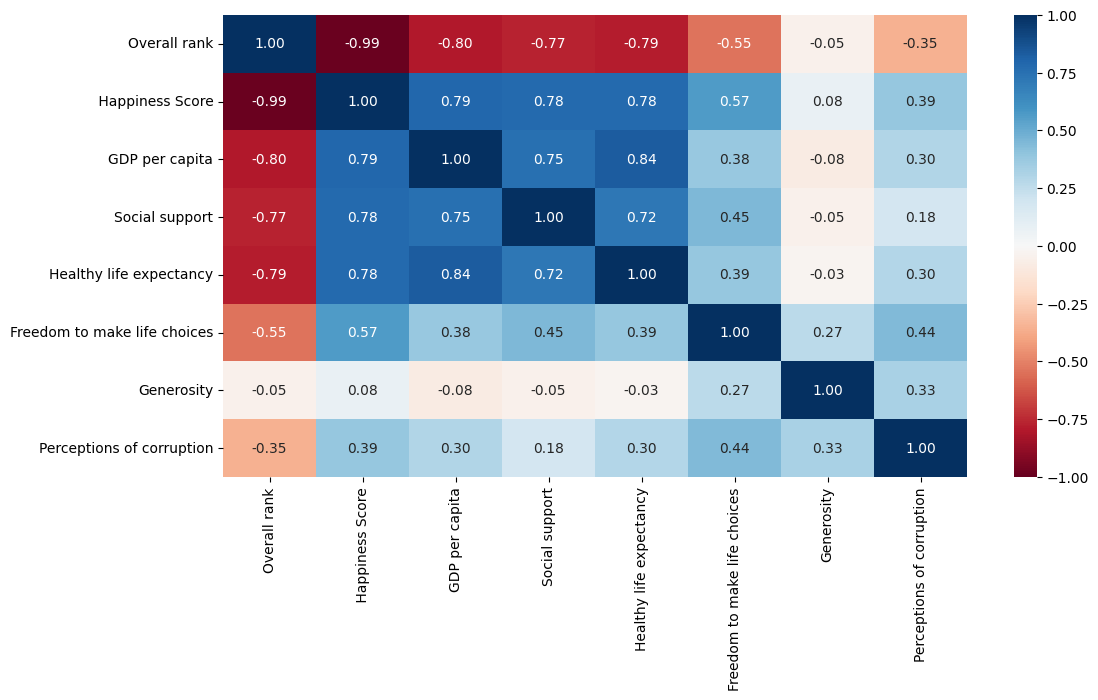

In [ ]:
numeric_df = df.select_dtypes(include='number')  # Select only numeric columns
corr = numeric_df.corr()
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap="RdBu",vmin=-1,vmax=1,fmt=".2f")

In [ ]:
print(df.columns)


Index(['Overall rank', 'Country or region', ' Happiness Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


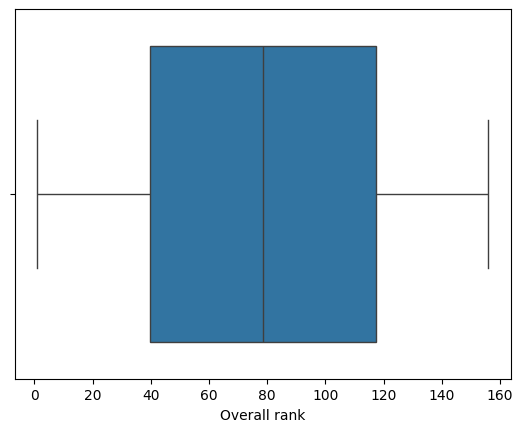

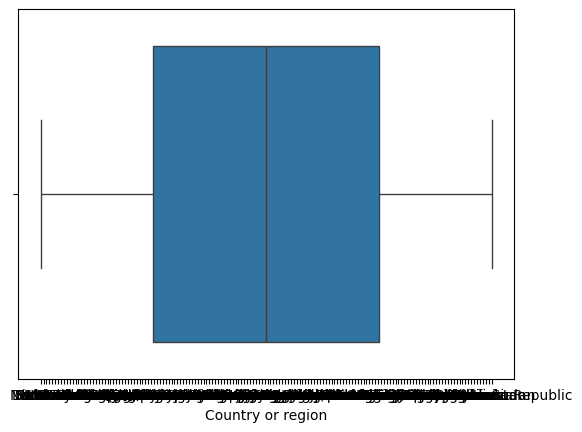

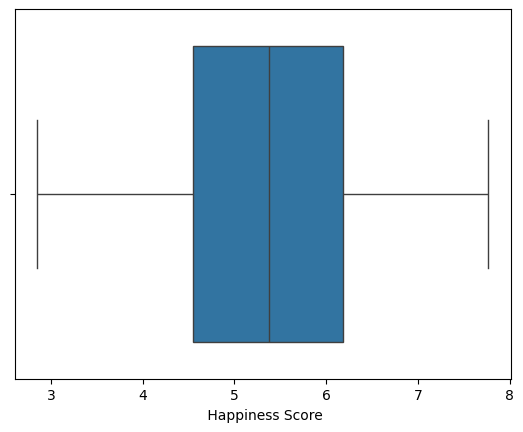

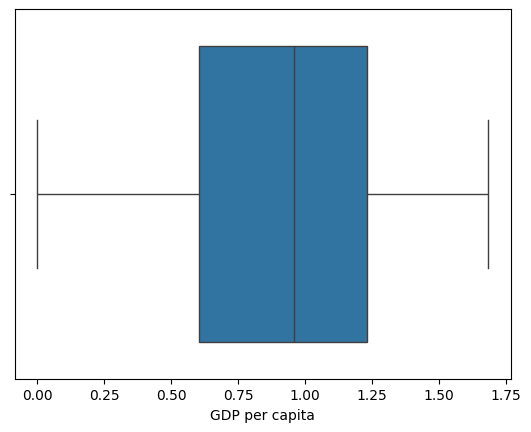

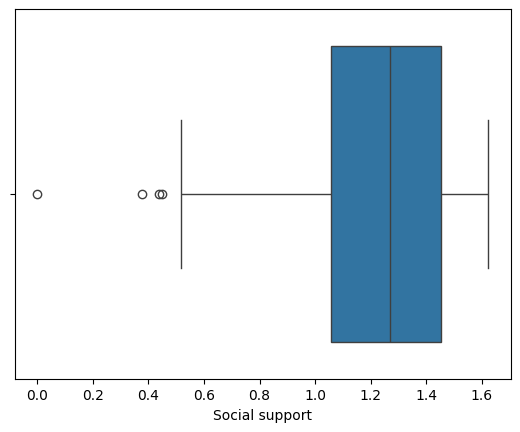

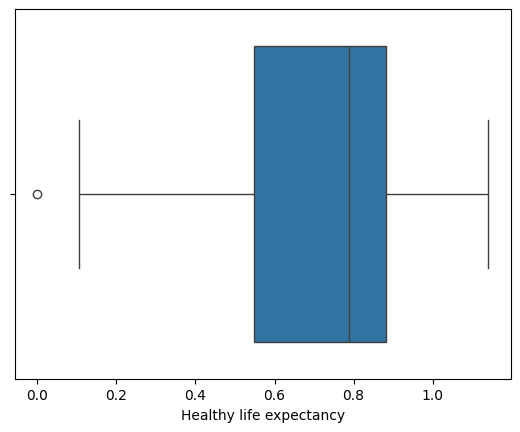

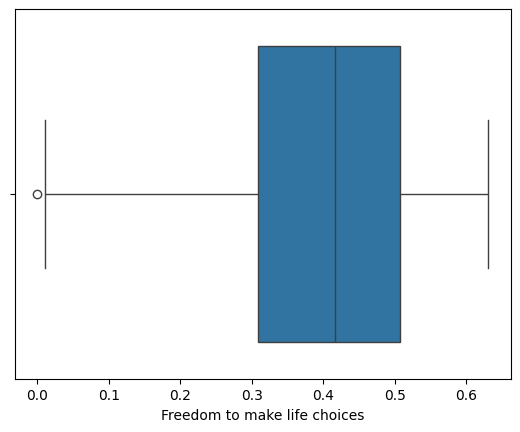

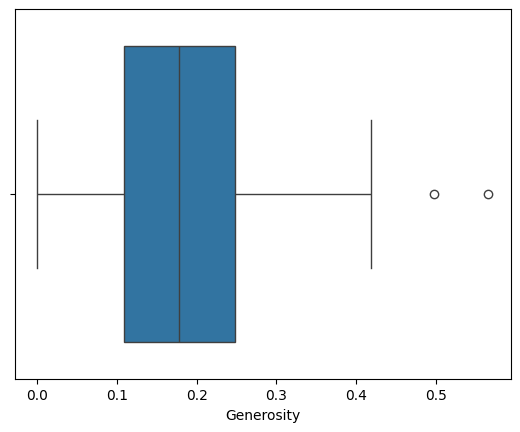

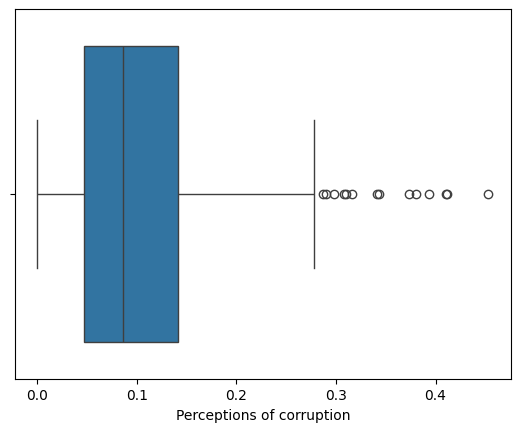

In [ ]:
column_list = ["Overall rank","Country or region"," Happiness Score","GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]
for col in column_list:
    sns.boxplot(x = df[col])
    plt.xlabel(col)
    plt.show()

In [ ]:
print(df.columns)


Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [ ]:
if 'Healthy life expectancy' in df.columns:
    print("Column 'Healthy life expectancy' exists in DataFrame.")
else:
    print("Column 'Healthy life expectancy' does not exist in DataFrame.")




Column 'Healthy life expectancy' exists in DataFrame.


In [ ]:
IQR = df["Perceptions of corruption"].quantile(0.75) - df["Perceptions of corruption"].quantile(0.25)

lower_boundary = df["Perceptions of corruption"].quantile(0.25) - (IQR * 1.5)
upper_boundary = df["Perceptions of corruption"].quantile(0.75) + (IQR * 1.5)

df["Perceptions of corruption"]= np.where(df["Perceptions of corruption"] > upper_boundary, upper_boundary,
                       np.where(df["Perceptions of corruption"] < lower_boundary, lower_boundary, df["Perceptions of corruption"]))

<Axes: xlabel='Perceptions of corruption'>

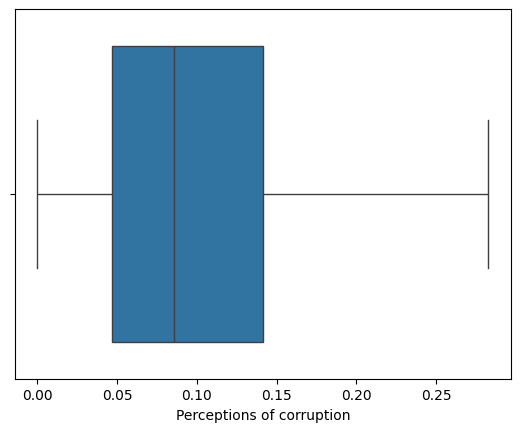

In [ ]:
sns.boxplot(data=df,x="Perceptions of corruption")

In [ ]:
IQR = df["Generosity"].quantile(0.75) - df["Generosity"].quantile(0.25)

lower_boundary = df["Generosity"].quantile(0.25) - (IQR * 1.5)
upper_boundary = df["Generosity"].quantile(0.75) + (IQR * 1.5)

df["Generosity"]= np.where(df["Generosity"] > upper_boundary, upper_boundary,
                       np.where(df["Generosity"] < lower_boundary, lower_boundary, df["Generosity"]))

<Axes: xlabel='Generosity'>

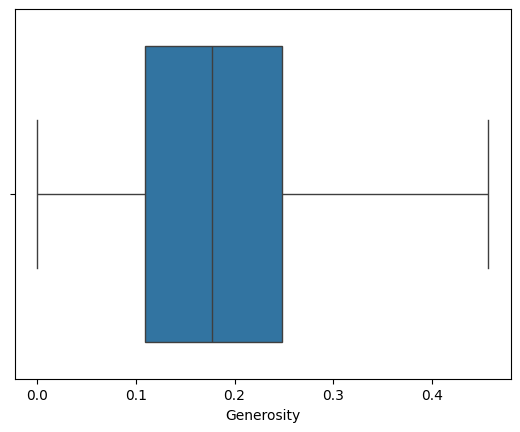

In [ ]:
sns.boxplot(data=df,x="Generosity")

In [ ]:
df.isnull().sum()

Overall rank                    0
Country or region               0
 Happiness Score                0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [ ]:
ndf = df.drop(columns=["Country or region","Overall rank"],axis=1)

In [ ]:
ndf.head()

Happiness Score  GDP per capita  Social support  Healthy life expectancy  \
0             7.769           1.340           1.587                    0.986   
1             7.600           1.383           1.573                    0.996   
2             7.554           1.488           1.582                    1.028   
3             7.494           1.380           1.624                    1.026   
4             7.488           1.396           1.522                    0.999   

   Freedom to make life choices  Generosity  Perceptions of corruption  
0                         0.596       0.153                   0.282625  
1                         0.592       0.252                   0.282625  
2                         0.603       0.271                   0.282625  
3                         0.591       0.354                   0.118000  
4                         0.557       0.322                   0.282625

In [ ]:
ndf.shape

(156, 7)

In [ ]:
from statsmodels.api import OLS

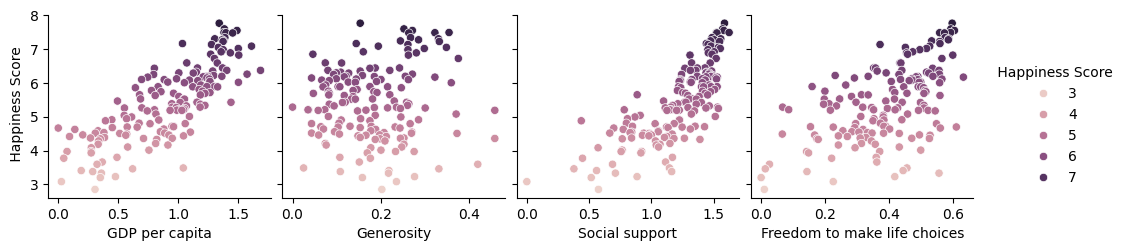

In [ ]:
sns.pairplot(
    ndf,
    x_vars=["GDP per capita","Generosity","Social support","Freedom to make life choices"],
    y_vars=[" Happiness Score"],hue=" Happiness Score"
)

In [ ]:
print(OLS(endog=ndf[" Happiness Score"],exog=ndf.drop(columns=" Happiness Score")).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:        Happiness Score   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1861.
Date:                Tue, 02 Jul 2024   Prob (F-statistic):                   4.31e-138
Time:                        08:01:18   Log-Likelihood:                         -150.63
No. Observations:                 156   AIC:                                      313.3
Df Residuals:                     150   BIC:                                      331.6
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(ndf.drop(columns=[" Happiness Score"]),ndf[" Happiness Score"],test_size=0.12,random_state=0)

In [ ]:
se = StandardScaler()

In [ ]:
X_train = se.fit_transform(X_train)
X_test = se.fit_transform(X_test)

In [ ]:
X_train.shape,X_test.shape

((137, 6), (19, 6))

In [ ]:
y_train.shape,y_test.shape

((137,), (19,))

MODEL TRAINING

Linear Regression

In [ ]:
model_le = LinearRegression()

LinearRegression()


In [ ]:
model_le.fit(X_train,y_train)

LinearRegression()

In [ ]:
model_le.coef_

array([0.37870777, 0.33117545, 0.19702884, 0.21957535, 0.00231828,
       0.12292227])

In [ ]:
model_le.intercept_

5.392824817518248

In [ ]:
le_y_pred = model_le.predict(X_test)

In [ ]:
print(f"Linear Regression Train Score: {model_le.score(X_train,y_train)}")

Linear Regression Train Score: 0.8008794955160057


In [ ]:
cross_v=cross_val_score(model_le,X_train,y_train,cv=10,scoring="r2").mean()

In [ ]:
print(f"Cross Validation Score: {cross_v}")

Cross Validation Score: 0.7066712956817645


In [ ]:
l_test_score = r2_score(y_test,le_y_pred)

In [ ]:
print(f"Linear Regression Test Score: {l_test_score}")

Linear Regression Test Score: 0.5445995351717277


In [ ]:
from sklearn.model_selection import GridSearchCV

# **Random** **Forest** **Regression**

In [ ]:
rf_model = RandomForestRegressor()


In [ ]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train,y_train)

In [ ]:
print("Random Forest Model Train Score:",rf_model.score(X_train,y_train)*100)
print("RF Cross Validation Score:",cross_val_score(rf_model,X_train,y_train,cv=10,scoring="r2").mean()*100)

Random Forest Model Train Score: 97.00158908683703
RF Cross Validation Score: 73.98956060113721


In [ ]:
iris = load_iris()

In [ ]:
X = iris.data
y = iris.target


**Random forest model overfitted**

# RF-model Tuning

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
rf_model = RandomForestRegressor(random_state=42)


In [ ]:
rf_params= {"max_depth": list(range(1,10)),
             "max_features": [2,3,4,5],
            "n_estimators": [100,200,300,400,500] }

In [ ]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2)

In [ ]:
rf_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [ ]:
rf_cv_model.best_params_

{'max_depth': 9, 'max_features': 5, 'n_estimators': 100}

In [ ]:
rf_tuned = RandomForestRegressor(max_depth= 9,max_features=3,n_estimators=500,random_state=42)

In [ ]:
rf_tuned.fit(X_train,y_train)

RandomForestRegressor(max_depth=9, max_features=3, n_estimators=500,
                      random_state=42)

In [ ]:
rf_y_pred=rf_tuned.predict(X_test)

In [ ]:
rf_score=rf_tuned.score(X_train,y_train)
rf_test_score= r2_score(y_test,rf_y_pred)

In [ ]:
print("Random Forest Train Score: ",rf_tuned.score(X_train,y_train))
print("Random Forest Cross Validation Score: ",cross_val_score(rf_tuned,X_train,y_train,cv=10,scoring="r2").mean())
print(f"Random Forest Test Score: {rf_test_score}")

Random Forest Train Score:  0.9043582193550185
Random Forest Cross Validation Score:  0.6548534372003153
Random Forest Test Score: 0.5989429573740523


In [ ]:
col_name = ndf.drop(columns=" Happiness Score",axis=1)

In [ ]:
print(col_name.columns)


Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [ ]:
dtr=DecisionTreeRegressor(random_state=42)

In [ ]:
if 'Overall rank' in df.columns:
    print("Column 'Overall rank' exists")
else:
    for col in df.columns:
        if 'overall' in col.lower() and 'rank' in col.lower():
            print(f"Found similar column: {col}")

Column 'Overall rank' exists


In [ ]:
x_train=(ndf.drop(columns=" Happiness Score"))
y_train=(ndf[" Happiness Score"])

In [ ]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
x_test=(ndf.drop(columns=" Happiness Score"))
y_test=(ndf[" Happiness Score"])

In [ ]:
y_train_pred=dtr.predict(x_train)
y_test_pred=dtr.predict(x_test)

#Decision tree for training data

In [ ]:
r2_score(y_train,y_train_pred)*100

100.0

 #Mean square error for training data with decison tree regressor

In [ ]:
mean_squared_error(y_train,y_train_pred)

0.0

In [ ]:
## Decision tree for testing data

In [ ]:
r2_score(y_test,y_test_pred)*100

100.0

#mean square error for testing data with decision tree regressor

In [ ]:
 mean_squared_error(y_test, y_test_pred)

0.0

XG boost model

In [ ]:
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
import pickle

In [ ]:
xg_reg= xgb.XGBRegressor()

In [ ]:
x_train = ndf.drop(columns=" Happiness Score")
y_train = ndf[" Happiness Score"]

xg_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_train_pred = xg_reg.predict(x_train)
y_test_pred = xg_reg.predict(x_test)

In [ ]:
rf = RandomForestRegressor()  # Create a Random Forest model
rf.fit(x_train, y_train)     # Train the model

RandomForestRegressor()

In [ ]:
rf.predict([[1.32629,1.32261,0.90563,0.63297,0.32957,0.45811]])



array([6.80622])

In [ ]:
rf.predict([[105,9,4,0.03880,1.45900,1.33095]])

array([6.73709])

In [ ]:
rf.predict([[58,9,2,0.04884,1.30232,1.40223]])

array([6.73709])

## Random forest for testing data

In [ ]:
r2_score(y_test,y_test_pred)*100

99.99990987010419

#Accuracy for with testing data XGboost Regression

In [ ]:
r2_score(y_test,y_test_pred)*100

99.99990987010419

In [ ]:
rfr = RandomForestRegressor()

In [ ]:
with open("World happiness report.pkl","wb") as f:
    pickle.dump(rfr,f)